
Importing the Libraries


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import os

# Set the environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

Dataset

In [12]:
# Provided data points
data = np.array([
    [2, 10],  # A1
    [2, 5],   # A2
    [8, 4],   # A3
    [5, 8],   # A4
    [7, 5],   # A5
    [6, 4],   # A6
    [1, 2],   # A7
    [4, 9]    # A8
])

Use the elbow method to find the optimal number of clusters

C:\Users\laila\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laila\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laila\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\laila\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: User

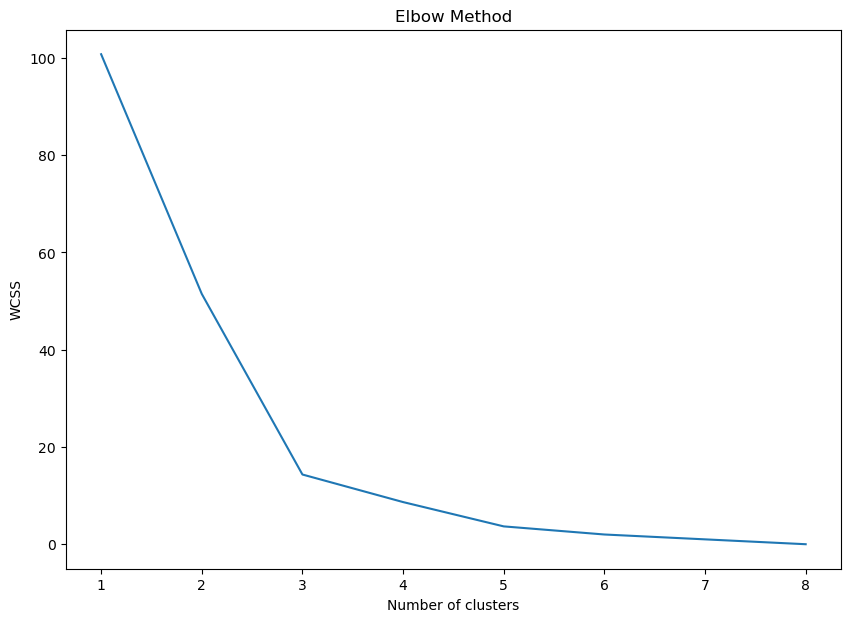

In [15]:
wcss = []
for i in range(1, 9):  # Use range from 1 to the number of samples
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 7))
plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Train the hierarchical clustering model

In [17]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(data)

C:\Users\laila\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Calculate the silhouette score

In [20]:
silhouette_avg = silhouette_score(data, y_kmeans)
print(f'The silhouette score is: {silhouette_avg}')

The silhouette score is: 0.5708086620582917


Visualize the clusters

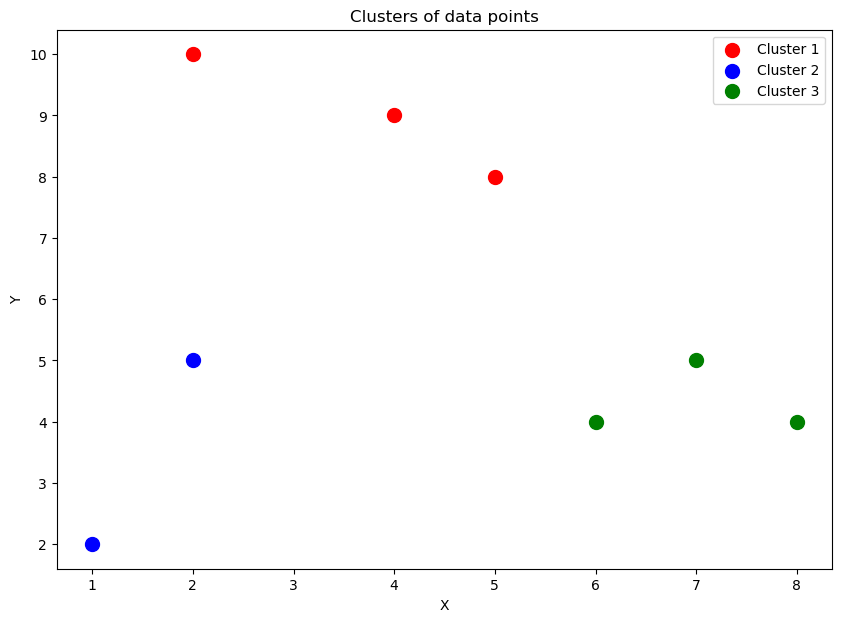

In [31]:
plt.figure(figsize=(10, 7))
plt.scatter(data[y_hc == 0, 0], data[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data[y_hc == 1, 0], data[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data[y_hc == 2, 0], data[y_hc == 2, 1], s=100, c='green', label='Cluster 3')

plt.title('Clusters of data points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()